Written by Adithya Solai


More about yfinance API here: https://pypi.org/project/yfinance/

Bloomberg Python API seems to require using C++ and Bloomberg C++ API: https://medium.com/@johann_78792/getting-started-with-bloombergs-python-desktop-api-5fd083b4193a

Fancy, Costly APIs:

https://rapidapi.com/marketplace

https://polygon.io/

In [ ]:
!pip install yfinance

     |████████████████████████████████| 5.5MB 9.0MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=4d064b1ac573facaca0dd35a3d333eadbfc736a8590f2e4bc1c7ec82fb57a1fc
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Initialize ehealth Ticker object so we can pull data from it pythonicly
ehealth = yf.Ticker("ehth")

**The next couple of cells show what type of data can be extracted from this API for $EHTH. The later cells also show simple plots of historical price and volume data**

*Need to test the API calls that don't work on \$EHTH with other Tickers to see if it is a problem specific to \$EHTH or the entire API.*

In [ ]:
ehealth.calendar

,0,1
Earnings Date,2021-02-18 00:00:00,2021-02-22 00:00:00
Earnings Average,4.08,4.08
Earnings Low,3.8,3.8
Earnings High,4.4,4.4
Revenue Average,372290000,372290000
Revenue Low,355950000,355950000
Revenue High,395900000,395900000


In [ ]:
ehealth.major_holders

,0,1
0,4.29%,% of Shares Held by All Insider
1,110.37%,% of Shares Held by Institutions
2,115.32%,% of Float Held by Institutions
3,347,Number of Institutions Holding Shares


In [ ]:
ehealth.institutional_holders

,Holder,Shares,Date Reported,% Out,Value
0,Blackrock Inc.,3937146,2020-09-29,0.1520,311034534
1,"Vanguard Group, Inc. (The)",2252529,2020-09-29,0.0870,177949791
2,"FMR, LLC",2196873,2020-09-29,0.0848,173552967
3,Ruffer LLP,1060786,2020-09-29,0.0410,83802094
4,State Street Corporation,897743,2020-09-29,0.0347,70921697
5,Citadel Advisors LLC,854042,2020-09-29,0.0330,67469318
6,St. Denis J. Villere & Company,844899,2020-09-29,0.0326,66747021
7,Granahan Investment Management Inc.,818550,2020-09-29,0.0316,64665450
8,Dimensional Fund Advisors LP,652739,2020-09-29,0.0252,51566381
9,Invesco Ltd.,646445,2020-09-29,0.0250,51069155


In [ ]:
# Shows options expirations
ehealth.options

('2020-12-18',
 '2021-01-15',
 '2021-02-19',
 '2021-05-21',
 '2021-10-15',
 '2022-01-21',
 '2023-01-20')

In [ ]:
# Get the option chaing for some valid expiration date
ehealth.option_chain('2020-12-18')

Options(calls=         contractSymbol       lastTradeDate  ...  contractSize  currency
0   EHTH201218C00050000 2020-11-04 17:36:24  ...       REGULAR       USD
1   EHTH201218C00055000 2020-11-16 18:12:02  ...       REGULAR       USD
2   EHTH201218C00060000 2020-11-19 19:22:47  ...       REGULAR       USD
3   EHTH201218C00065000 2020-11-18 16:55:37  ...       REGULAR       USD
4   EHTH201218C00070000 2020-11-20 16:34:11  ...       REGULAR       USD
5   EHTH201218C00075000 2020-11-20 20:57:57  ...       REGULAR       USD
6   EHTH201218C00080000 2020-11-20 20:07:17  ...       REGULAR       USD
7   EHTH201218C00085000 2020-11-20 20:56:07  ...       REGULAR       USD
8   EHTH201218C00090000 2020-11-20 19:12:05  ...       REGULAR       USD
9   EHTH201218C00095000 2020-11-18 16:36:42  ...       REGULAR       USD
10  EHTH201218C00100000 2020-11-20 20:42:11  ...       REGULAR       USD
11  EHTH201218C00105000 2020-11-10 17:49:04  ...       REGULAR       USD
12  EHTH201218C00115000 2020-10-22 16

In [ ]:
# Recommendations of analysts over time
ehealth.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-04-02 06:07:00,Bank oferica,Neutral,,down
2012-06-29 05:39:00,Bank of America,Buy,,up
2012-07-27 06:48:00,Deutsche Bank,Hold,,main
2012-10-26 08:08:00,Deutsche Bank,Hold,,main
2012-12-17 09:25:05,William Blair,Outperform,,init
...,...,...,...,...
2020-07-24 11:11:29,Barclays,Overweight,,main
2020-07-24 12:27:49,Credit Suisse,Outperform,,main
2020-07-27 11:29:51,Raymond James,Outperform,,main


In [ ]:
# These calls are not applicable to eHealth:
# ehealth.actions
# ehealth.dividends
# ehealth.splits
# ehealth.financials
# ehealth.earnings
# ehealth.cashflow
# ehealth.balance_sheet

In [ ]:
# Get all daily price + volume data for $EHTH since its 10-13-2006 IPO
ehealth_df = ehealth.history(period="max", interval='1d')
ehealth_df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-10-20,22.500000,22.840000,22.250000,22.670000,97000,0,0
2006-10-23,22.910000,22.910000,21.969999,22.000000,293900,0,0
2006-10-24,22.000000,22.250000,21.750000,22.100000,132700,0,0
2006-10-25,22.000000,22.790001,21.780001,22.350000,249000,0,0
2006-10-26,22.250000,23.500000,21.700001,23.500000,203000,0,0
...,...,...,...,...,...,...,...
2020-11-16,72.220001,74.120003,71.339996,73.980003,657000,0,0
2020-11-17,73.720001,74.300003,72.040001,73.510002,475200,0,0
2020-11-18,73.980003,75.220001,72.699997,72.849998,474800,0,0


**Plot Open Prices for eHealth since their IPO (10-20-2006)**

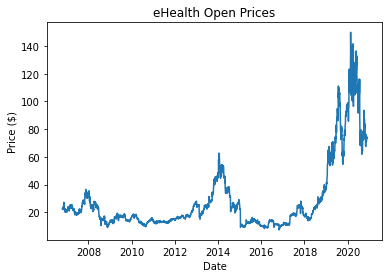

In [ ]:
Y = ehealth_df['Open']
X = ehealth_df.index
plt.plot(X, Y)
plt.title("eHealth Open Prices")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.show()

**Plot High & Low Prices along with Volume for eHealth since their IPO (10-20-2006)**

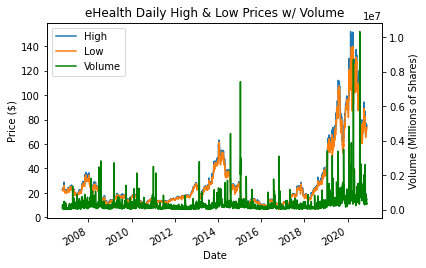

In [ ]:
# Make high-low prices a separate sub-df so that we can 
# easily call plot() on this df to automatically add 
# colored lines and a legend.
high_low = ehealth_df[["High", "Low"]]
ax1 = high_low.plot()
ax1.set_xlabel("Date")
ax1.set_ylabel("Price ($)")

# Add Volume as a twin plot so that the y-axis for Volume
# scales with the y-axis for High & Low Prices
ax2 = ax1.twinx()
ax2.plot(ehealth_df.index, ehealth_df['Volume'], color = "green")
ax2.set_ylabel("Volume (Millions of Shares)")

# Create a consolidated legend for lines from ax1 and ax2
ax1.legend((ax1.lines[0], ax1.lines[1], ax2.lines[0]), ("High", "Low", "Volume"))

plt.title("eHealth Daily High & Low Prices w/ Volume")

plt.show()

**Plot analyst ratings from William Blair, Deutsche Bank, and Bank of America over time.**


In [ ]:
ratings = ehealth.recommendations
ratings

,Firm,To Grade,From Grade,Action
Date,,,,
2012-04-02 06:07:00,Bank oferica,Neutral,,down
2012-06-29 05:39:00,Bank of America,Buy,,up
2012-07-27 06:48:00,Deutsche Bank,Hold,,main
2012-10-26 08:08:00,Deutsche Bank,Hold,,main
2012-12-17 09:25:05,William Blair,Outperform,,init
...,...,...,...,...
2020-07-24 11:11:29,Barclays,Overweight,,main
2020-07-24 12:27:49,Credit Suisse,Outperform,,main
2020-07-27 11:29:51,Raymond James,Outperform,,main


In [ ]:
len(ratings)

77

In [ ]:
# Trim down to only the firm and their new rating for some date.
# Don't care about the "From Grade" or whether it is their first time
# giving a rating.
ratings_to_plot = pd.DataFrame(ratings[["Firm", "To Grade"]])
ratings_to_plot

,Firm,To Grade
Date,,
2012-04-02 06:07:00,Bank oferica,Neutral
2012-06-29 05:39:00,Bank of America,Buy
2012-07-27 06:48:00,Deutsche Bank,Hold
2012-10-26 08:08:00,Deutsche Bank,Hold
2012-12-17 09:25:05,William Blair,Outperform
...,...,...
2020-07-24 11:11:29,Barclays,Overweight
2020-07-24 12:27:49,Credit Suisse,Outperform
2020-07-27 11:29:51,Raymond James,Outperform


In [ ]:
ratings_to_plot["Firm"].unique()

array(['Bank oferica', 'Bank of America', 'Deutsche Bank',
       'William Blair', 'Janney Capital', 'Lazard',
       'SunTrust Robinson Humphrey', 'RBC Capital', 'Jefferies',
       'Stifel Nicolaus', 'Craig-Hallum', 'Citigroup', 'Stifel',
       'FBR Capital', 'Wells Fargo', 'Cantor Fitzgerald',
       'Chardan Capital', 'Evercore ISI Group', 'Credit Suisse',
       'First Analysis', 'Raymond James', 'Barclays', 'SVB Leerink',
       'Goldman Sachs'], dtype=object)

In [ ]:
# Convert all 'Bank oferica' to 'Bank of America'
def bofa_fix(x):
  if x == 'Bank oferica':
    return 'Bank of America'
  else:
    return x

ratings_to_plot["Firm"] = ratings_to_plot["Firm"].apply(bofa_fix)
ratings_to_plot

,Firm,To Grade
Date,,
2012-04-02 06:07:00,Bank of America,Neutral
2012-06-29 05:39:00,Bank of America,Buy
2012-07-27 06:48:00,Deutsche Bank,Hold
2012-10-26 08:08:00,Deutsche Bank,Hold
2012-12-17 09:25:05,William Blair,Outperform
...,...,...
2020-07-24 11:11:29,Barclays,Overweight
2020-07-24 12:27:49,Credit Suisse,Outperform
2020-07-27 11:29:51,Raymond James,Outperform


*Need to do more research on what these ratings actually mean and how they relate to each other. Some might be synonyms as well.*

In [ ]:
ratings_to_plot["To Grade"].unique()

array(['Neutral', 'Buy', 'Hold', 'Outperform', 'Underperform', 'Sell',
       'Sector Perform', 'Market Perform', 'Overweight', 'Strong Buy'],
      dtype=object)

In [ ]:
# Convert Ratings to Numbers.
# Neutral, Hold, Sector Perform, Market Perform are all 0
# Buy, Outperform, Strong Buy are all 1
# Underperform, Sell, Overweight are all -1

ratings_converter = {
    'Underperform': -1,
    'Sell': -1,
    'Overweight': -1,
    'Neutral': 0,
    'Hold': 0,
    'Sector Perform': 0,
    'Market Perform': 0,
    'Buy': 1,
    'Outperform': 1,
    'Strong Buy': 1
}
def ratings_to_num(x):
  return ratings_converter[x]

ratings_to_plot["To Grade"] = ratings_to_plot["To Grade"].apply(ratings_to_num)

In [ ]:
# Trim down to only BofA, Deutsche Bank, and William Blair
firms = ['Bank of America', 'Deutsche Bank', 'William Blair']
final_ratings = pd.DataFrame(ratings_to_plot[ratings_to_plot["Firm"].isin(firms)])
# Add Date as a column from the index so that we can use it to make a pivot table later
final_ratings['Date'] = final_ratings.index
final_ratings

,Firm,To Grade,Date
Date,,,
2012-04-02 06:07:00,Bank of America,0,2012-04-02 06:07:00
2012-06-29 05:39:00,Bank of America,1,2012-06-29 05:39:00
2012-07-27 06:48:00,Deutsche Bank,0,2012-07-27 06:48:00
2012-10-26 08:08:00,Deutsche Bank,0,2012-10-26 08:08:00
2012-12-17 09:25:05,William Blair,1,2012-12-17 09:25:05
2013-01-04 07:09:00,Bank of America,-1,2013-01-04 07:09:00
2013-02-15 08:31:14,Deutsche Bank,0,2013-02-15 08:31:14
2013-02-15 08:39:15,Bank of America,-1,2013-02-15 08:39:15
2013-04-02 06:09:02,Bank of America,1,2013-04-02 06:09:02


In [ ]:
# Create a pivot table to convert the Firms we are looking at into their
# own columns so that it is easy to plot later on.
final_ratings = final_ratings.pivot(index='Date', columns='Firm', values='To Grade')
final_ratings

Firm,Bank of America,Deutsche Bank,William Blair
Date,,,
2012-04-02 06:07:00,0.0,NaN,NaN
2012-06-29 05:39:00,1.0,NaN,NaN
2012-07-27 06:48:00,NaN,0.0,NaN
2012-10-26 08:08:00,NaN,0.0,NaN
2012-12-17 09:25:05,NaN,NaN,1.0
2013-01-04 07:09:00,-1.0,NaN,NaN
2013-02-15 08:31:14,NaN,0.0,NaN
2013-02-15 08:39:15,-1.0,NaN,NaN
2013-04-02 06:09:02,1.0,NaN,NaN


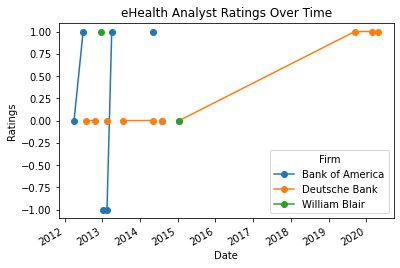

In [ ]:
# Plot the pivot table.
# Colored lines and legend will automatically be drawn
# because we are using a pivot table with firms as columns.
final_ratings.plot(marker='o')
plt.xlabel("Date")
plt.ylabel("Ratings")
plt.title("eHealth Analyst Ratings Over Time")
plt.show()